In [1]:

import torch
from panda_butler.envs.butler_tasks import ButlerStackEnv
from butler.utils import show_video
from pl_bolts.models.detection.faster_rcnn.faster_rcnn_module import FasterRCNN
import numpy as np
import time
import cv2

import gymnasium as gym
import panda_gym
import matplotlib.pyplot as plt

render = False
#env = gym.make("PandaStack-v3", render=True)
env = ButlerStackEnv(render=render)

pybullet build time: May 20 2022 19:45:31


argv[0]=--background_color_red=0.8745098114013672
argv[1]=
argv[2]=
argv[3]=
argv[4]=
argv[5]=
argv[6]=
argv[7]=
argv[8]=
argv[9]=
argv[10]=
argv[11]=
argv[12]=
argv[13]=
argv[14]=
argv[15]=
argv[16]=
argv[17]=
argv[18]=
argv[19]=
argv[20]=
argv[21]=--background_color_green=0.21176470816135406
argv[22]=
argv[23]=
argv[24]=
argv[25]=
argv[26]=
argv[27]=
argv[28]=
argv[29]=
argv[30]=
argv[31]=
argv[32]=
argv[33]=
argv[34]=
argv[35]=
argv[36]=
argv[37]=
argv[38]=
argv[39]=
argv[40]=
argv[41]=
argv[42]=--background_color_blue=0.1764705926179886


In [2]:
# from pl_bolts.models.detection.retinanet.retinanet_module import RetinaNet

observation, info = env.reset()
pos = env.sim.get_base_position(env.robot.body_name)
pos += np.array([0.5, 0.0, 0.0])

roll = 0.0
pitch = -30
yaw = 0.0
distance = 0.5

width = 224
height = 224

frames = []
segs=[]
T = 10
t = time.time()
for _ in range(T):
    # action = env.action_space.sample() # random action
    action = np.zeros(env.action_space.shape)
    observation, reward, terminated, truncated, info = env.step(action)
    ret = env.render(mode='rgb_array',
                             width=width,
                             height=height,
                             target_position=pos,
                             pitch=pitch,
                             roll=roll,
                             yaw=yaw,
                             distance=distance)
    frames.append(ret["rgb"])
    segs.append(ret["seg"])
    print("FPS: ", 1/(time.time()-t))
    t = time.time()

# model = FasterRCNN(pretrained=True, num_classes=2)
# # model = RetinaNet(pretrained=True, num_classes=2)
# model.eval()
# img = frames[0]
# # throw away alpha channel
# img = img[:, :, :3]
# print('shape works', img.shape)
# with torch.no_grad():
#     X = torch.Tensor(img)
#     X = X.permute(2, 0, 1)
#     X = X.unsqueeze(0)
#     y = model(X)
#     boxes = y[0]['boxes']
#     labels = y[0]['labels']
#     print('Number of boxes', len(boxes))
#     im_arr_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#     # draw boxes on image
#     for box in boxes:
#         x1, y1, x2, y2 = box
#         # convert to int
#         x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
#         print('boxes:', x1, y1, x2, y2)
#         # convert img (M, N, 3) to the expected format for cv2.rectangle 
#         cv2.rectangle(im_arr_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)
# plt.imshow(im_arr_bgr)
    

FPS:  34.09338015346599
FPS:  36.293895210487605
FPS:  36.55995258184861
FPS:  35.842625192274824
FPS:  36.31809365475201
FPS:  36.49410515874742
FPS:  36.52111523257231
FPS:  36.57780723479959
FPS:  36.211485996477535
FPS:  36.208047376099586


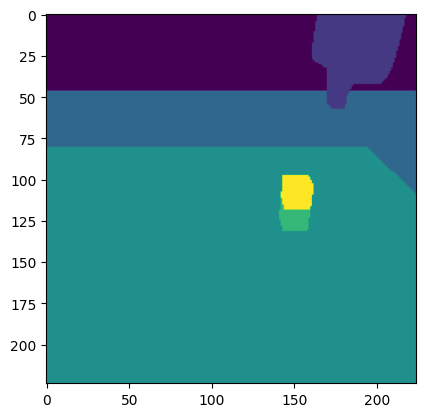

In [3]:
plt.imshow(segs[0])

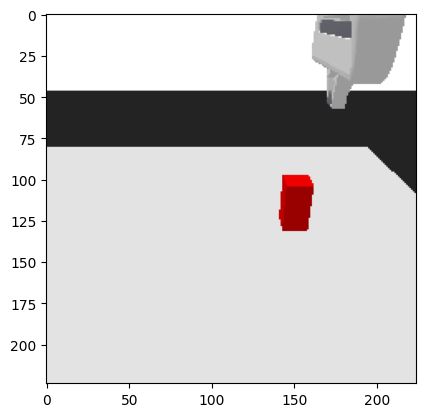

In [4]:
plt.imshow(frames[0])

In [5]:
segs[0][115:125, 150:175]

array([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2]], dtype=int32)

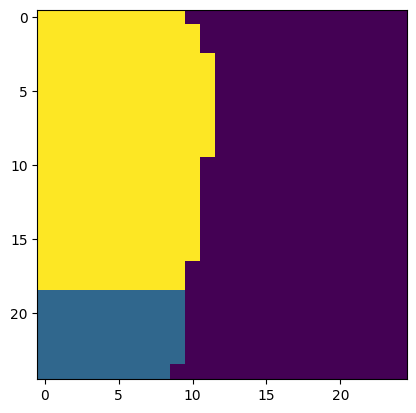

In [6]:
plt.imshow(segs[0][100:125, 150:175])

98 131 141 161


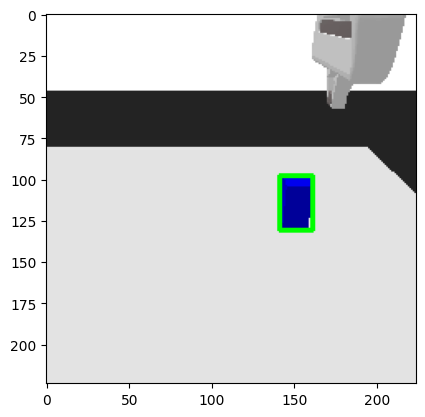

In [7]:
obj = 5
obj2 = 3
# mask out everything except the obj and obj2
mask = np.logical_or(segs[0] == obj, segs[0] == obj2)
# get the bounding box of the mask
y, x = np.where(mask)
y1, y2 = y.min(), y.max()
x1, x2 = x.min(), x.max()
# print the bounding box
print(y1, y2, x1, x2)


im_arr_bgr = cv2.cvtColor(frames[0], cv2.COLOR_RGB2BGR)
cv2.rectangle(im_arr_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(im_arr_bgr)